## Name: Mohammad Anish
## Roll No: 19195
## Department of Physics

## importing the libraries

In [1]:
import csv,os,re,sys,codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib,  statistics
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

## Data Importing

In [2]:
# Load the CSV files
training_data = pd.read_csv('C:\IISERB\SEM IX\ML\project11\Train_Data.csv')
class_labels = pd.read_csv('C:\IISERB\SEM IX\ML\project11\Traindata_classlabels.csv')

X=training_data
y=class_labels

# Combine data into a single DataFrame
df = pd.concat([training_data, class_labels], axis=1)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isnull().sum()
#It implies there are no null values in our data

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.describe().T.sort_values(by='std', ascending = False)

,count,mean,std,min,25%,50%,75%,max
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
talk_time,2000.0,11.01100,5.463955,2.0,6.00,11.0,16.00,20.0
sc_w,2000.0,5.76700,4.356398,0.0,2.00,5.0,9.00,18.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0


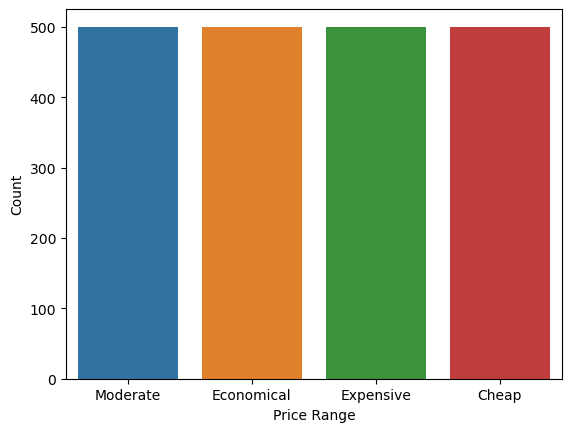

In [6]:
# Distribution of labels
label_counts = df['price_range'].value_counts()
sns.barplot(x=['Moderate','Economical','Expensive','Cheap'], y=label_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
#plt.title('Distribution of Price Ranges')
plt.show()

In [7]:
label_counts

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [8]:
count_p = (df['px_height'] == 0).sum()
count_s = (df['sc_w'] == 0).sum()
print(count_p,count_s)

2 180


In [9]:

columns_to_mean = ['px_height','sc_w']


mean_values = df[columns_to_mean].mean()


print(mean_values)

px_height    645.108
sc_w           5.767
dtype: float64


In [10]:
df['px_height'].replace(0, mean_values[0], inplace=True)
df['sc_w'].replace(0, mean_values[1], inplace=True)

<AxesSubplot:>

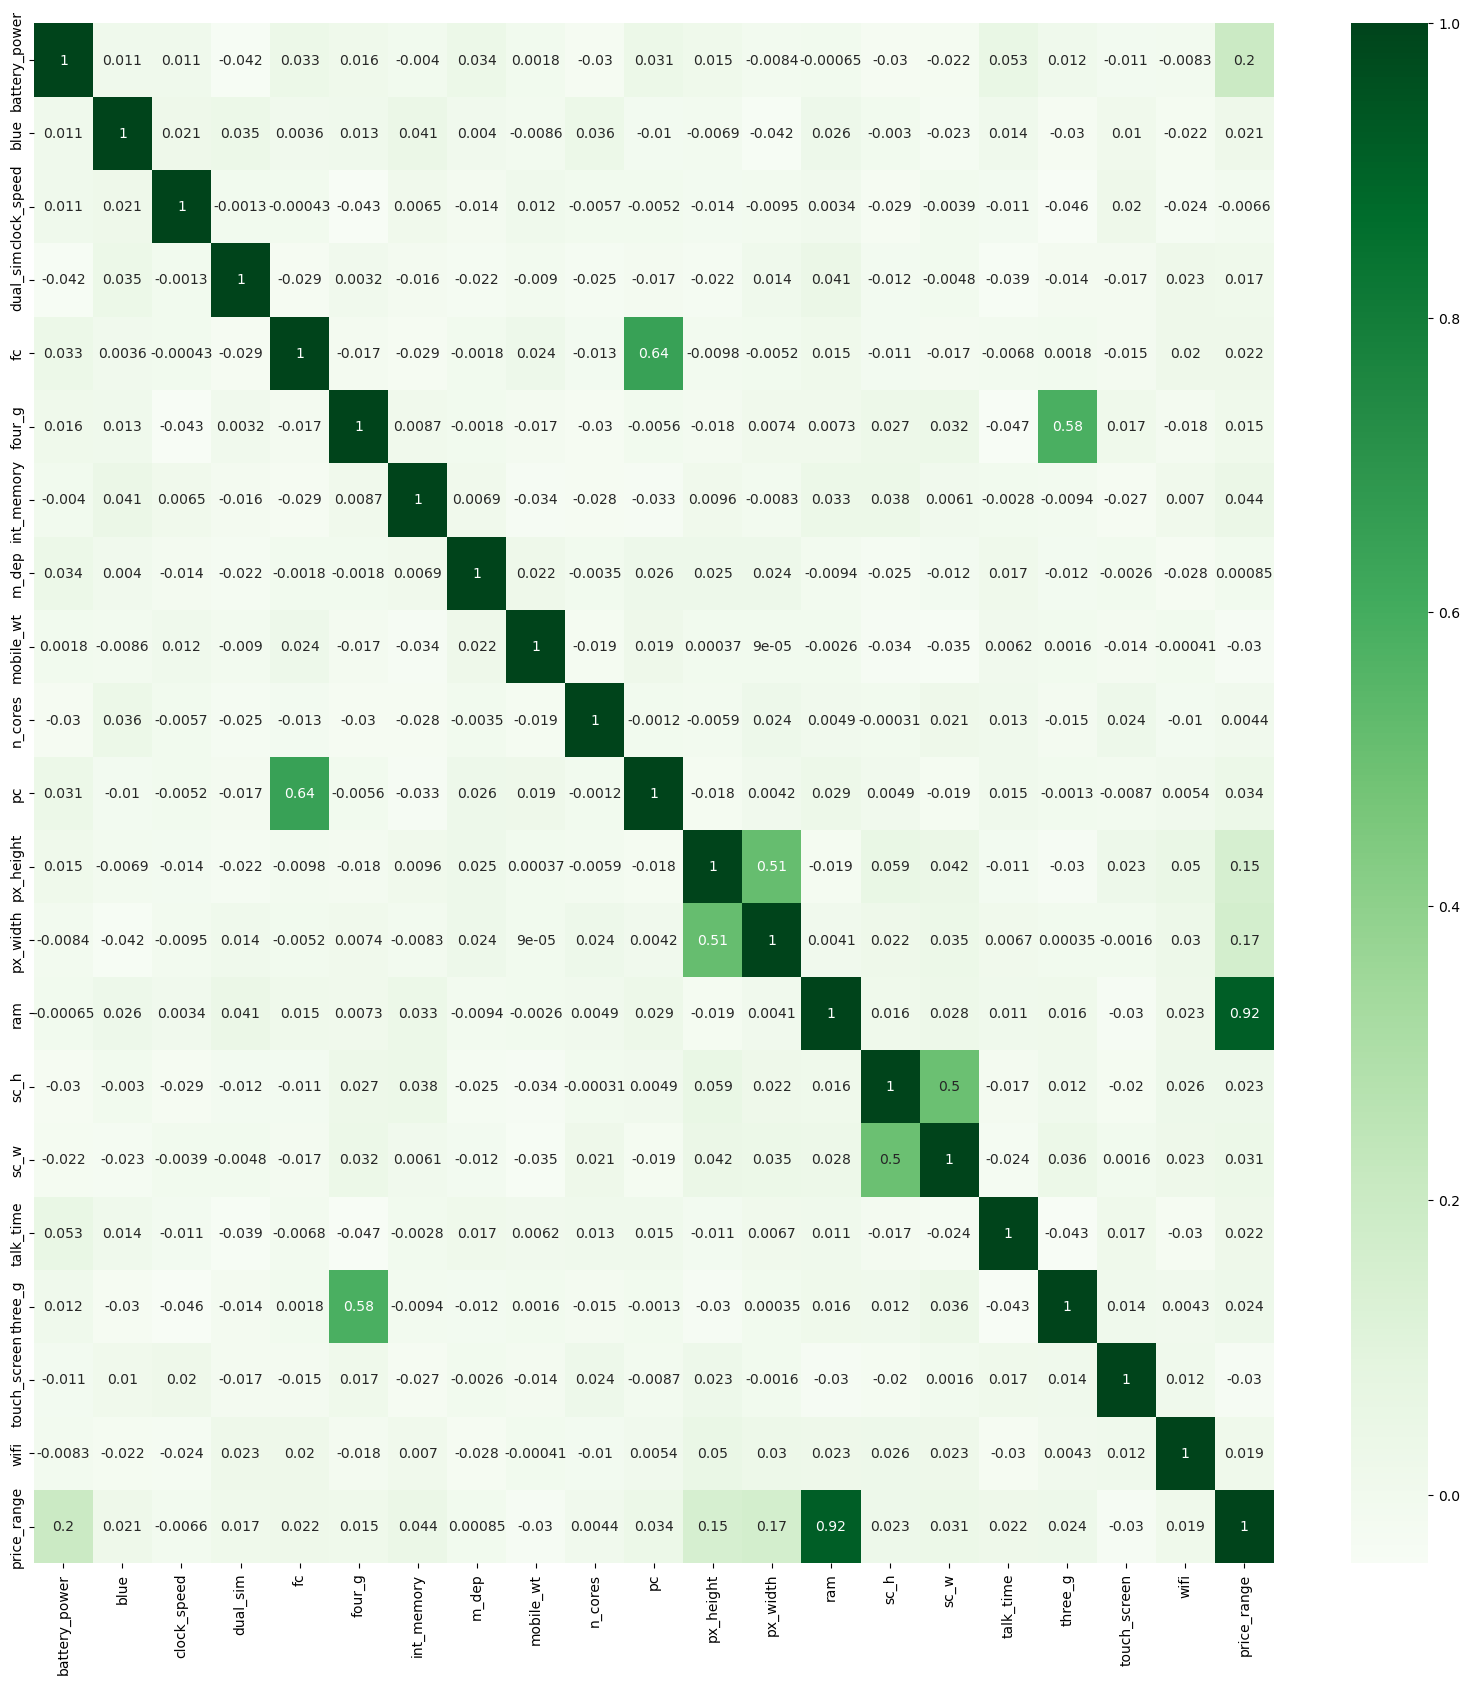

In [11]:
correlation = df.corr()
plt.figure(figsize = [20, 20])
sns.heatmap(correlation, cmap = 'Greens', annot = True)

<AxesSubplot:>

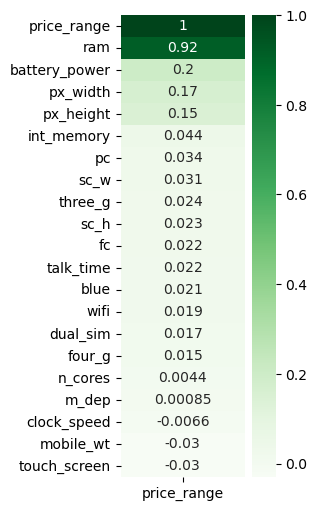

In [12]:
plt.figure(figsize = [2, 6])
sns.heatmap(correlation[['price_range']].sort_values (by = 'price_range', ascending = False), cmap = 'Greens', annot = True)

## Mutual Infromation

In [13]:
mi=mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi})
mi_df

,Feature,Mutual_Information
0,battery_power,0.027014
1,blue,0.011587
2,clock_speed,0.027310
3,dual_sim,0.000000
4,fc,0.000000
5,four_g,0.019843
6,int_memory,0.000000
7,m_dep,0.000000
8,mobile_wt,0.008668
9,n_cores,0.013207


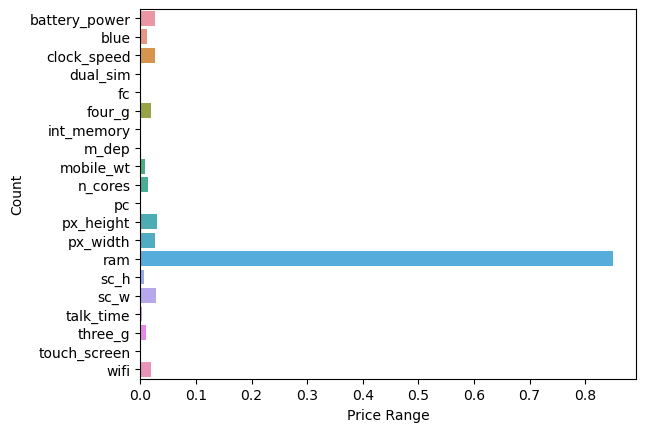

In [14]:

sns.barplot(x=mi_df.iloc[:,1], y=mi_df.iloc[:,0])
plt.xlabel('Price Range')
plt.ylabel('Count')
#plt.title('Distribution of Price Ranges')
plt.show()

## Splitting test train data

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Preprocessing with one hot encoding and standard scalar

In [16]:
# Define categorical and numerical features for one-hot encoding and scaling
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
numerical_features = list(set(X_train.columns) - set(categorical_features))

In [17]:
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.difference(categorical_features)),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [18]:
# Create a pipeline with the preprocessor, feature selection, and SVM classifier
model_ohe = Pipeline([
    ('preprocessor', preprocessor)
])

In [19]:
# Preprocess the training data and convert to DataFrame
X_train_preprocessed = pd.DataFrame(model_ohe.named_steps['preprocessor'].fit_transform(X_train),
                                    columns=numerical_features +
                                    list(model_ohe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))

X_test_preprocessed = pd.DataFrame(model_ohe.named_steps['preprocessor'].transform(X_test),
                                   columns=numerical_features +
                                   list(model_ohe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))

## X_train and X_test after preprocessing

In [20]:
X_train_preprocessed

,pc,px_height,px_width,sc_w,clock_speed,fc,mobile_wt,n_cores,ram,m_dep,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1.389193,-1.259189,1.309253,1.584829,-0.704590,-1.250335,-1.551637,0.350239,-0.798849,-1.285642,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.078406,-1.259189,1.770460,-0.003457,-1.396849,-0.768374,1.073159,0.844549,1.582302,1.637675,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-1.024573,1.187471,-0.074370,1.365755,1.372187,-1.392089,1.510625,0.350239,-1.361502,-0.199305,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.386692,-1.259189,-0.535577,0.106080,1.026057,-1.193634,-0.676705,-0.803150,0.832847,0.278589,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.723138,0.698139,0.156234,-0.386837,-0.358460,-0.711673,1.073159,0.679779,-0.985650,-0.392794,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.312090,0.086474,1.770460,-0.934522,-1.396849,-0.796725,1.510625,0.679779,0.612287,0.227303,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1596,1.475970,-1.259189,-0.304973,-1.208364,-0.704590,0.167198,0.635693,0.515009,0.425486,1.148124,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1597,1.103743,0.575806,2.462271,1.256218,-0.012331,0.790913,-1.114171,1.338859,0.238685,0.248284,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1598,-1.218680,1.432137,1.770460,-0.112994,-0.704590,-0.768374,-1.551637,1.668399,-0.965394,-0.423100,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [21]:
X_test_preprocessed

,pc,px_height,px_width,sc_w,clock_speed,fc,mobile_wt,n_cores,ram,m_dep,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1.224774,1.187471,2.692875,-0.003457,0.333799,0.847614,0.635693,1.338859,1.278469,0.525696,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.702047,0.086474,-0.535577,-1.098827,-1.050719,-1.703946,0.198227,1.668399,-0.810102,-1.523423,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-1.572638,-0.647524,-0.996785,1.310987,-0.358460,0.167198,-0.239239,0.679779,0.022626,0.956967,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.273269,-1.136856,-0.996785,-0.058226,-1.050719,0.167198,-1.114171,-0.473611,1.375245,0.887031,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.724665,-1.259189,1.539856,-1.482207,1.718316,-0.456517,-0.676705,0.350239,-0.567035,0.775133,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.656157,1.187471,1.539856,0.489459,1.718316,-1.250335,-0.239239,1.668399,-1.041915,-1.180738,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
396,0.363856,-1.136856,-0.996785,0.270385,0.679928,-0.173010,-0.239239,0.844549,-0.195684,-0.162006,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
397,0.551112,-0.892190,1.770460,0.872839,0.679928,-1.165283,0.198227,1.174089,0.105898,-0.849708,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
398,1.555896,0.453473,-0.535577,-1.208364,0.333799,-0.853426,0.198227,0.020699,1.177191,0.691211,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Decision Tree

In [35]:
model = Pipeline([
    ('feature_selector', SelectKBest(mutual_info_classif)),  
    ('dt', DecisionTreeClassifier(random_state=42))  
])

In [36]:
param_grid = {
    'feature_selector__k': [15,16,18,20],
     'dt__criterion':['entropy','gini'],
     'dt__max_depth': [None],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [2, 4]
}

# param_grid = {
#     'feature_selector__k': [5,6],
#      'dt__criterion':['gini', 'entropy'],
#      'dt__max_depth': [None, 10, 20],
#     'dt__min_samples_split': [2, 5],
#     'dt__min_samples_leaf': [2, 4]
# }

In [37]:
total_iterations = len(list(ParameterGrid(param_grid)))
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)


print(f"Starting grid search with {total_iterations} combinations...")

combination_counter = 0

for params in ParameterGrid(param_grid):
    combination_counter += 1
    print(f"\rCombination {combination_counter} out of {total_iterations} done.", end='', flush=True)
    
  
    model.set_params(**params)
    
 
    grid_search = grid_search.fit(X_train_preprocessed, y_train)

print("\nGrid search completed.")


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test_preprocessed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Model Accuracy: {accuracy:.2f}")
# print("Best Model Parameters:")


Starting grid search with 32 combinations...
Combination 32 out of 32 done.
Grid search completed.


In [38]:
dt_best_params = grid_search.best_params_
conf_matrix_dt = confusion_matrix(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='macro')
recall_dt = recall_score(y_test, y_pred, average='macro')
f1_dt = f1_score(y_test, y_pred, average='macro')


print('Best Parameters: ', dt_best_params)
print('Confusion Matrix:\n', conf_matrix_dt)
print('Accuracy: ', accuracy_dt)
print('Precision: ', precision_dt)
print('Recall: ', recall_dt)
print('F1 Score: ', f1_dt)
print()

print(classification_report(y_test, y_pred))

Best Parameters:  {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5, 'feature_selector__k': 15}
Confusion Matrix:
 [[96  4  0  0]
 [ 8 82 10  0]
 [ 0 14 81  5]
 [ 0  0  8 92]]
Accuracy:  0.8775
Precision:  0.877428087376541
Recall:  0.8775
F1 Score:  0.8773142436578234

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       100
           1       0.82      0.82      0.82       100
           2       0.82      0.81      0.81       100
           3       0.95      0.92      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



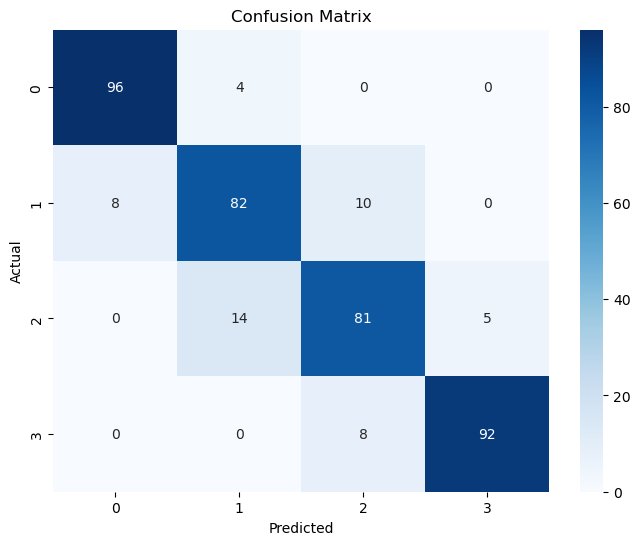

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## kNN

In [63]:
model = Pipeline([
    ('feature_selector', SelectKBest(mutual_info_classif)),  
    ('knn', KNeighborsClassifier())  
])

In [64]:
param_grid = {
    'feature_selector__k': [16,18,20],
    'knn__n_neighbors': [800,900],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto','kd_tree'],
    'knn__leaf_size':[10,15,20]
}

In [65]:
total_iterations = len(list(ParameterGrid(param_grid)))
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)


print(f"Starting grid search with {total_iterations} combinations...")

combination_counter = 0

for params in ParameterGrid(param_grid):
    combination_counter += 1
    print(f"\rCombination {combination_counter} out of {total_iterations} done.", end='', flush=True)
    
   
    model.set_params(**params)
    
    
    grid_search = grid_search.fit(X_train_preprocessed, y_train)


print("\nGrid search completed.")


best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_preprocessed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Model Accuracy: {accuracy:.2f}")
# print("Best Model Parameters:")


Starting grid search with 72 combinations...
Combination 72 out of 72 done.
Grid search completed.


In [66]:
knn_best_params = grid_search.best_params_
conf_matrix_knn = confusion_matrix(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='macro')
recall_knn = recall_score(y_test, y_pred, average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')


print('Best Parameters: ', knn_best_params)
print('Confusion Matrix:\n', conf_matrix_knn)
print('Accuracy: ', accuracy_knn)
print('Precision: ', precision_knn)
print('Recall: ', recall_knn)
print('F1 Score: ', f1_knn)
print()

print(classification_report(y_test, y_pred))

Best Parameters:  {'feature_selector__k': 16, 'knn__algorithm': 'kd_tree', 'knn__leaf_size': 10, 'knn__n_neighbors': 800, 'knn__weights': 'distance'}
Confusion Matrix:
 [[94  6  0  0]
 [16 63 21  0]
 [ 0 13 73 14]
 [ 0  0 22 78]]
Accuracy:  0.77
Precision:  0.774993642314098
Recall:  0.77
F1 Score:  0.7689929283679283

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       100
           1       0.77      0.63      0.69       100
           2       0.63      0.73      0.68       100
           3       0.85      0.78      0.81       100

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



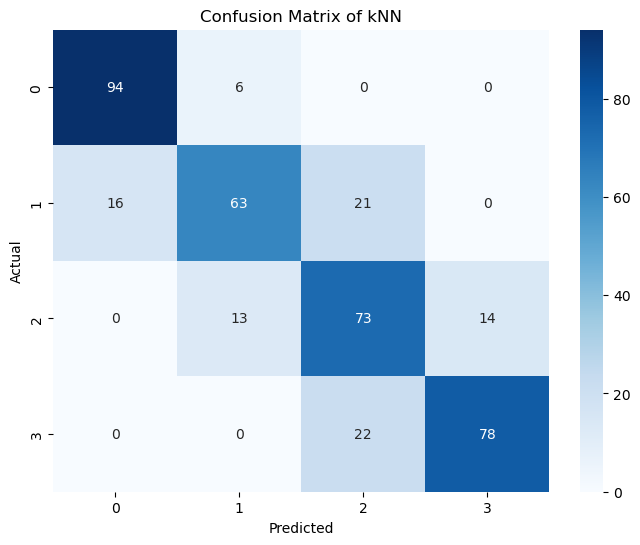

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of kNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine

In [75]:
model = Pipeline([
    ('feature_selector', SelectKBest(mutual_info_classif)),  
    ('svm', svm.SVC(random_state=42))
])

In [76]:
param_grid = {
    'feature_selector__k': [16,20,'all'],
    'svm__C': [0.1, 1, 100],
    'svm__gamma' : ['scale','auto'],
    'svm__shrinking' : [True, False]
}

In [77]:
total_iterations = len(list(ParameterGrid(param_grid)))
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)


print(f"Starting grid search with {total_iterations} combinations...")

combination_counter = 0

for params in ParameterGrid(param_grid):
    combination_counter += 1
    print(f"\rCombination {combination_counter} out of {total_iterations} done.", end='', flush=True)
    
    # Set the parameters for the current combination
    model.set_params(**params)
    
    # Fit the model for the current combination
    grid_search = grid_search.fit(X_train_preprocessed, y_train)

# Print a message indicating the end of the grid search
print("\nGrid search completed.")

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_preprocessed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Model Accuracy: {accuracy:.2f}")
# print("Best Model Parameters:")


Starting grid search with 36 combinations...
Combination 36 out of 36 done.
Grid search completed.


In [78]:
svm_best_params = grid_search.best_params_
conf_matrix_svm = confusion_matrix(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='macro')
recall_svm = recall_score(y_test, y_pred, average='macro')
f1_svm = f1_score(y_test, y_pred, average='macro')


print('Best Parameters: ', svm_best_params)
print('Confusion Matrix:\n', conf_matrix_svm)
print('Accuracy: ', accuracy_svm)
print('Precision: ', precision_svm)
print('Recall: ', recall_svm)
print('F1 Score: ', f1_svm)
print()

print(classification_report(y_test, y_pred))

Best Parameters:  {'feature_selector__k': 16, 'svm__C': 1, 'svm__gamma': 'auto', 'svm__shrinking': False}
Confusion Matrix:
 [[98  2  0  0]
 [ 4 90  6  0]
 [ 0  8 83  9]
 [ 0  0  8 92]]
Accuracy:  0.9075
Precision:  0.9068363764817962
Recall:  0.9075
F1 Score:  0.9070898772959348

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.90      0.90      0.90       100
           2       0.86      0.83      0.84       100
           3       0.91      0.92      0.92       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



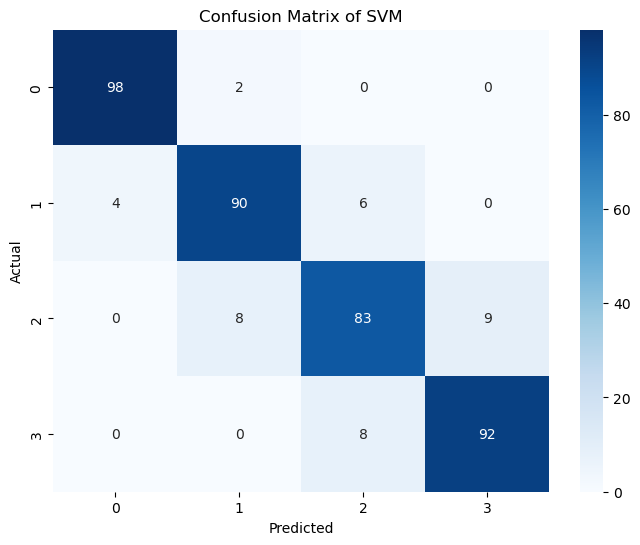

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [81]:
model = Pipeline([
    ('feature_selector', SelectKBest(mutual_info_classif)),  
    ('rf', RandomForestClassifier(max_features=None, random_state=42))  
])

In [82]:
param_grid = {
    'feature_selector__k': [15,16,20,'all'],
    'rf__criterion':['gini', 'entropy'],
    'rf__n_estimators': [150,180],
    'rf__max_depth': [10, 50, 100],
}

In [83]:
total_iterations = len(list(ParameterGrid(param_grid)))
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)


print(f"Starting grid search with {total_iterations} combinations...")

combination_counter = 0

for params in ParameterGrid(param_grid):
    combination_counter += 1
    print(f"\rCombination {combination_counter} out of {total_iterations} done.", end='', flush=True)
    
    # Set the parameters for the current combination
    model.set_params(**params)
    
    # Fit the model for the current combination
    grid_search = grid_search.fit(X_train_preprocessed, y_train)

# Print a message indicating the end of the grid search
print("\nGrid search completed.")

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_preprocessed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Model Accuracy: {accuracy:.2f}")
# print("Best Model Parameters:")


Starting grid search with 48 combinations...
Combination 48 out of 48 done.
Grid search completed.


In [84]:
rf_best_params = grid_search.best_params_
conf_matrix_rf = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro')


print('Best Parameters: ', rf_best_params)
print('Confusion Matrix:\n', conf_matrix_rf)
print('Accuracy: ', accuracy_rf)
print('Precision: ', precision_rf)
print('Recall: ', recall_rf)
print('F1 Score: ', f1_rf)
print()

print(classification_report(y_test, y_pred))

Best Parameters:  {'feature_selector__k': 20, 'rf__criterion': 'entropy', 'rf__max_depth': 100, 'rf__n_estimators': 150}
Confusion Matrix:
 [[98  2  0  0]
 [ 5 88  7  0]
 [ 0  6 89  5]
 [ 0  0  6 94]]
Accuracy:  0.9225
Precision:  0.9225417366122677
Recall:  0.9225
F1 Score:  0.9223470404887784

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.92      0.88      0.90       100
           2       0.87      0.89      0.88       100
           3       0.95      0.94      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



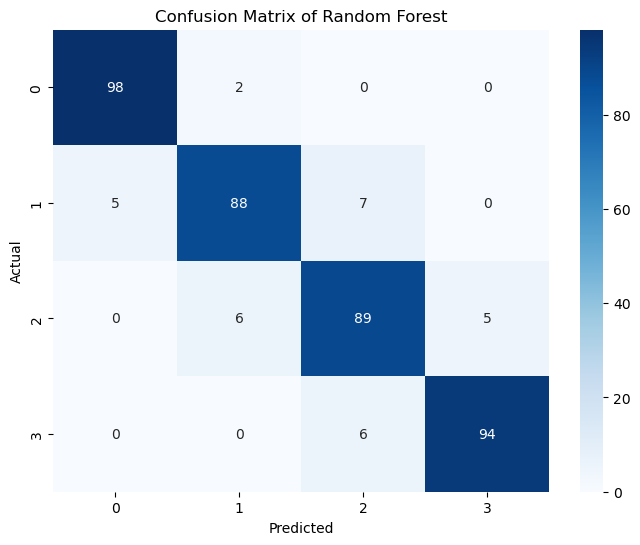

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [105]:
model = Pipeline([
    ('feature_selector', SelectKBest(mutual_info_classif)),  
    ('lr', LogisticRegression(max_iter=1000, random_state=42))  
])

In [106]:
param_grid = {
    'feature_selector__k': [16,20,'all'],
    'lr__C': [0.5, 1],
    'lr__solver': ['lbfgs', 'liblinear', 'saga'],
    'lr__penalty' : ['l1','l2',None]
}

In [107]:
total_iterations = len(list(ParameterGrid(param_grid)))
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)


print(f"Starting grid search with {total_iterations} combinations...")

combination_counter = 0

for params in ParameterGrid(param_grid):
    combination_counter += 1
    print(f"\rCombination {combination_counter} out of {total_iterations} done.", end='', flush=True)
    
    # Set the parameters for the current combination
    model.set_params(**params)
    
    # Fit the model for the current combination
    grid_search = grid_search.fit(X_train_preprocessed, y_train)

# Print a message indicating the end of the grid search
print("\nGrid search completed.")

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_preprocessed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Model Accuracy: {accuracy:.2f}")
# print("Best Model Parameters:")


Starting grid search with 54 combinations...
Combination 54 out of 54 done.
Grid search completed.


In [108]:
lr_best_params = grid_search.best_params_
conf_matrix_lr = confusion_matrix(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='macro')
recall_lr = recall_score(y_test, y_pred, average='macro')
f1_lr = f1_score(y_test, y_pred, average='macro')


print('Best Parameters: ', lr_best_params)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Accuracy: ', accuracy_lr)
print('Precision: ', precision_lr)
print('Recall: ', recall_lr)
print('F1 Score: ', f1_lr)
print()

print(classification_report(y_test, y_pred))

Best Parameters:  {'feature_selector__k': 'all', 'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Confusion Matrix:
 [[100   0   0   0]
 [  1  96   3   0]
 [  0   0  98   2]
 [  0   0   2  98]]
Accuracy:  0.98
Precision:  0.9803888301451504
Recall:  0.98
F1 Score:  0.9800334884339738

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.96      0.98       100
           2       0.95      0.98      0.97       100
           3       0.98      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



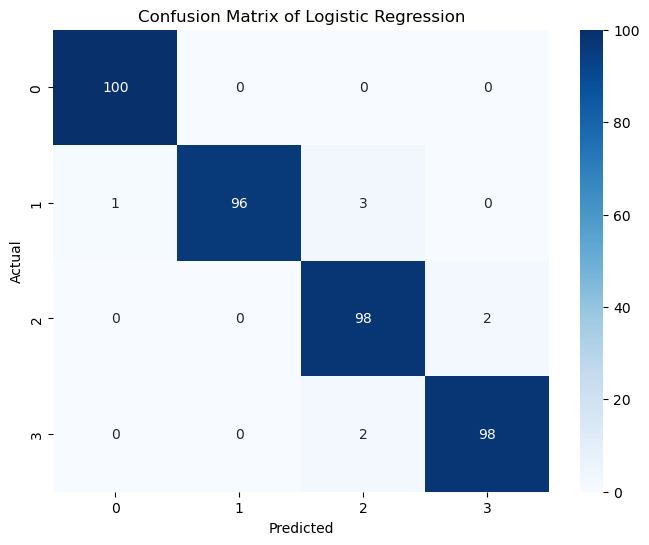

In [109]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## F1 macro visualization

In [113]:
f1macro = [f1_dt,f1_rf,f1_svm,f1_knn,f1_lr]
f1macro

[0.8773142436578234,
 0.9223470404887784,
 0.9070898772959348,
 0.7689929283679283,
 0.9800334884339738]

In [114]:
model_names = ['dt','rf','svm','knn','lr']

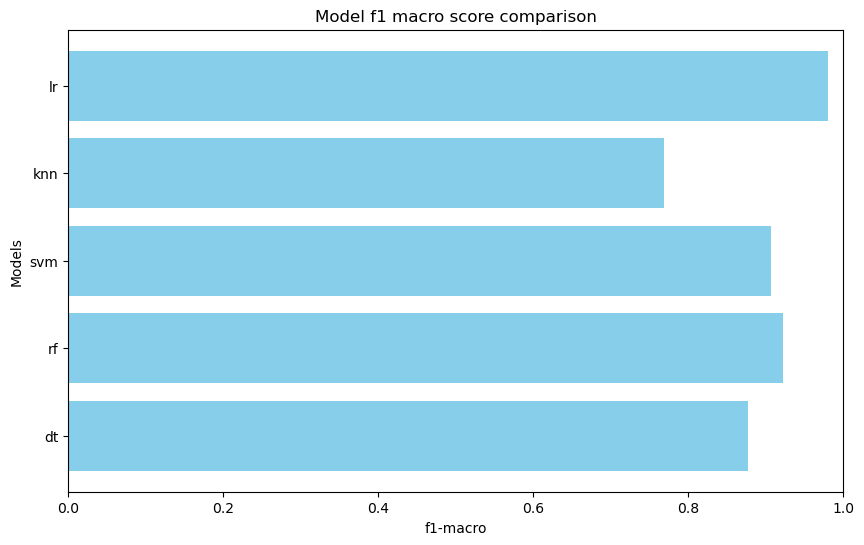

In [136]:
# Visualize evaluation metrics
plt.figure(figsize=(10, 6))
plt.barh(model_names, f1macro, color='skyblue')
plt.xlabel('f1-macro')
plt.ylabel('Models')
plt.title('Model f1 macro score comparison')
plt.xlim(0, 1)
plt.show()

## Importing test data

In [116]:
testdata = pd.read_csv("C:/IISERB/SEM IX/ML/project11/test_data.csv")
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [117]:
testdata.describe().T.sort_values(by='std', ascending = False)

,count,mean,std,min,25%,50%,75%,max
ram,1000.0,2138.9980,1088.092278,263.0,1237.25,2153.5,3065.50,3989.0
px_width,1000.0,1239.7740,439.670981,501.0,831.75,1250.0,1637.75,1998.0
px_height,1000.0,627.1210,432.929699,0.0,263.75,564.5,903.00,1907.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
pc,1000.0,10.0540,6.095099,0.0,5.00,10.0,16.00,20.0
talk_time,1000.0,11.0850,5.497636,2.0,6.75,11.0,16.00,20.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
sc_h,1000.0,11.9950,4.320607,5.0,8.00,12.0,16.00,19.0


In [118]:
columns_to_mean = ['px_height','sc_w']
mean_values_test = testdata[columns_to_mean].mean()
print(mean_values_test)

px_height    627.121
sc_w           5.316
dtype: float64


In [119]:
testdata['px_height'].replace(0, mean_values_test[0], inplace=True)
testdata['sc_w'].replace(0, mean_values_test[1], inplace=True)

In [120]:
testdata.describe().T.sort_values(by='std', ascending = False)

,count,mean,std,min,25%,50%,75%,max
ram,1000.0,2138.998000,1088.092278,263.0,1237.25,2153.500,3065.50,3989.0
px_width,1000.0,1239.774000,439.670981,501.0,831.75,1250.000,1637.75,1998.0
battery_power,1000.0,1248.510000,432.458227,500.0,895.00,1246.500,1629.25,1999.0
px_height,1000.0,628.375242,432.017593,2.0,267.25,565.000,903.00,1907.0
mobile_wt,1000.0,139.511000,34.851550,80.0,109.75,139.000,170.00,200.0
int_memory,1000.0,33.652000,18.128694,2.0,18.00,34.500,49.00,64.0
pc,1000.0,10.054000,6.095099,0.0,5.00,10.000,16.00,20.0
talk_time,1000.0,11.085000,5.497636,2.0,6.75,11.000,16.00,20.0
fc,1000.0,4.593000,4.463325,0.0,1.00,3.000,7.00,19.0
sc_h,1000.0,11.995000,4.320607,5.0,8.00,12.000,16.00,19.0


## Preprocessing for test data

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), testdata.columns.difference(categorical_features)),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [124]:
# Preprocess the training data and convert to DataFrame
testdata_preprocessed = pd.DataFrame(model_ohe.named_steps['preprocessor'].fit_transform(testdata),
                                    columns=numerical_features +
                                    list(model_ohe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))

testdata_preprocessed

,pc,px_height,px_width,sc_w,clock_speed,fc,mobile_wt,n_cores,ram,m_dep,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,-0.475451,0.312601,2.108676,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.931852,0.391912,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.942782,-1.255832,-0.132927,1.509303,1.006341,1.478120,0.293833,0.319433,0.272405,-0.871028,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.292077,1.519087,-0.805408,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485925,0.287236,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.688249,-1.255832,3.005317,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.772057,1.165604,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.429135,-0.169994,1.436195,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.279352,-0.977979,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.433249,-1.029568,1.122981,-0.062340,0.875263,1.168338,1.140174,0.036185,-0.743596,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
996,-1.479519,0.312601,-1.029568,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.212651,0.892536,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
997,-0.146932,-0.169994,-0.805408,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.350567,-0.943846,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
998,0.658173,-1.255832,-1.029568,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.367237,-0.927917,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Applying logistic regression to test data

In [125]:
lr_best_params

{'feature_selector__k': 'all',
 'lr__C': 1,
 'lr__penalty': 'l1',
 'lr__solver': 'saga'}

In [126]:
best_model_lr = Pipeline([
    ('feature_selector', SelectKBest(mutual_info_classif, k='all')),
    ('lr', LogisticRegression(max_iter=1000, random_state=42, C=1, penalty='l1', solver='saga'))
])


In [131]:
finalpred_lr = best_model.predict(testdata_preprocessed)

In [132]:
finalpred_lr

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [133]:
Final_vals = pd.DataFrame({'price_range': finalpred_lr})

In [134]:
label_counts_lr = Final_vals['price_range'].value_counts()
label_counts_lr

2    259
0    256
3    255
1    230
Name: price_range, dtype: int64

## price range outputs as csv

In [135]:
Final_vals.to_csv('Mohammad_Anish_labels.csv', index=False, header=False, line_terminator='\n')